In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):

  # Input layer (4 features of the iris dataset) --> hidden layers (2 layers with 8 and 9 neurons each (arbituary)) --> output (predict the 3 classes of iris flowers)
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__() # Instanstiate nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  # Use RELU to push the neural network forward
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [ ]:
# Create instance of model
torch.manual_seed(123)
model = Model()

In [ ]:
# Read in data
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# Changing last column from strings to numbers
mapping = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
df['variety'] = df['variety'].map(mapping)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Assign X and y and convert them to numpy arrays
X = df.drop('variety', axis=1).values
y = df['variety'].values

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Convert X into float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y into long tensors (integers)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Set the criterion of model to measure the error
criterion = nn.CrossEntropyLoss() # Cross Entropy Loss is useful when you have unbalanced training set

# Choose Adam optimizer and set learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01) # lower learning rate = longer training time
#print(model.parameters)

In [ ]:
# Train model
epochs = 200
losses =[]

for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train)

  # Measure store the loss (will be high at first)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  # Print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Backpropagation (use error rate from forward propagation and feed it thru the network to fine tune the weights)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.3000280857086182
Epoch: 10 and loss: 1.0762708187103271
Epoch: 20 and loss: 1.0085793733596802
Epoch: 30 and loss: 0.9020299911499023
Epoch: 40 and loss: 0.7384814023971558
Epoch: 50 and loss: 0.5705949068069458
Epoch: 60 and loss: 0.4621734619140625
Epoch: 70 and loss: 0.38202375173568726
Epoch: 80 and loss: 0.30348700284957886
Epoch: 90 and loss: 0.22500041127204895
Epoch: 100 and loss: 0.1599440723657608
Epoch: 110 and loss: 0.11675645411014557
Epoch: 120 and loss: 0.09197696298360825
Epoch: 130 and loss: 0.07843367010354996
Epoch: 140 and loss: 0.07072877138853073
Epoch: 150 and loss: 0.0660254955291748
Epoch: 160 and loss: 0.06295224279165268
Epoch: 170 and loss: 0.06079847365617752
Epoch: 180 and loss: 0.05919342488050461
Epoch: 190 and loss: 0.05794815346598625


Text(0.5, 0, 'Epoch')

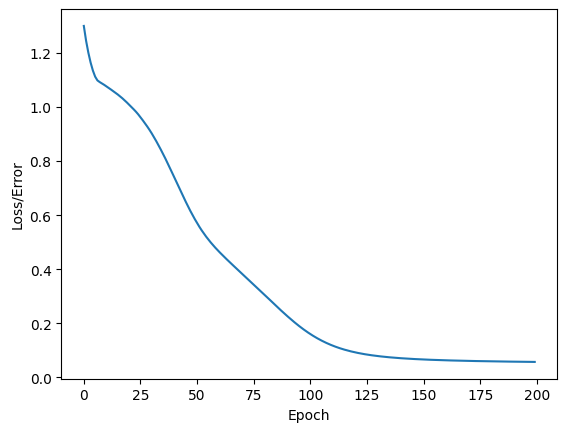

In [ ]:
# Visualize loss
plt.plot(range(epochs), losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epoch")

In [ ]:
# Evaluate on test data set
with torch.no_grad(): # Basically turn off back propagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

print(loss)

tensor(0.0573)


In [ ]:
# Print test results
correct = 0

# Print header and a separator line
print(f"{'Sample':<10} | {'Likelihood':<40} | {'Predicted Class':<15} | {'True Class':<15}")
print("-" * 85)

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # For each data, print which outcome is most likely (i.e. higher value in 1st row = higher likelihood the flower is Setosa)
    print(f'{i+1:<10} | {str(y_val):<40} | {y_val.argmax().item():<15} | {y_test[i]:<15}')

    # Count # of correct predictions
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct!')

Sample     | Likelihood                               | Predicted Class | True Class     
-------------------------------------------------------------------------------------
1          | tensor([-3.7941,  4.4331, -0.3070])      | 1               | 1              
2          | tensor([ 16.6753,   9.8216, -22.2479])   | 0               | 0              
3          | tensor([-14.2626,   1.2249,  12.0976])   | 2               | 2              
4          | tensor([-4.3056,  4.1514,  0.3848])      | 1               | 1              
5          | tensor([-4.5545,  4.5974,  0.2974])      | 1               | 1              
6          | tensor([ 15.1887,   9.1396, -20.4578])   | 0               | 0              
7          | tensor([ 0.0548,  5.2117, -4.3700])      | 1               | 1              
8          | tensor([-9.3673,  2.9033,  6.1110])      | 2               | 2              
9          | tensor([-6.6492,  3.3134,  3.2251])      | 1               | 1              
10         | t

In [ ]:
# Predict new data
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

with torch.no_grad():
  prediction = model(new_iris).argmax().item()
  if prediction == 0:
    print("Setosa")
  elif prediction == 1:
    print("Versicolor")
  else:
    print("Virginica")

Setosa


In [ ]:
# Save NN model with trained parameters
torch.save(model.state_dict(), "iris_nn_model.pt")

In [ ]:
# Load saved NN model
new_model = Model()
new_model.load_state_dict(torch.load("iris_nn_model.pt"))

<All keys matched successfully>

In [ ]:
# Verify model is loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [ ]:
# Predict "new_iris" with loaded model
with torch.no_grad():
  prediction_new_model = new_model(new_iris).argmax().item() # new_model is used instead of model
  if prediction_new_model == 0:
    print("Setosa")
  elif prediction_new_model == 1:
    print("Versicolor")
  else:
    print("Virginica")

Setosa
